In [2]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

In [8]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 639.9 kB/s eta 0:00:0000:0100:31
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 128.7 kB/s eta 0:00:0000:0200:15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 153.4 kB/s eta 0:00:0000:0100:20
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 227.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 69.8 kB/s eta 0:00:00m-:--:--
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling triton-3.0.0:
      Successfully uninstalled triton-3.0.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-

In [1]:
from unsloth import FastLanguageModel
import torch
torch.cuda.is_available()
max_seq_length = 2048 
dtype = None 
load_in_4bit = True 

fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",     
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit",
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",       
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",          
] 

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    # model_name = "unsloth/Llama-3.2-3B-bnb-4bit",
    # model_name="Vikhrmodels/Vikhr-Llama-3.2-1B-Instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.10.3: Fast Llama patching. Transformers = 4.46.0.dev0.
   \\   /|    GPU: NVIDIA GeForce RTX 3050 Laptop GPU. Max memory: 4.0 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.0+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


Unsloth: We fixed a gradient accumulation bug, but it seems like you don't have the latest transformers version!
Please update transformers via:
`pip uninstall transformers -y && pip install --upgrade --no-cache-dir "git+https://github.com/huggingface/transformers.git"`


We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

Lora r=16

In [3]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",    
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False, 
    loftq_config = None,
)

Unsloth 2024.9.post4 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


Lora r=32

In [3]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, 
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, 
    bias = "none", 
    use_gradient_checkpointing = "unsloth", 
    random_state = 3407,
    use_rslora = False,  
    loftq_config = None, 
)

Unsloth 2024.9.post4 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


Lora r=64

In [2]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, 
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, 
    bias = "none",    
    use_gradient_checkpointing = "unsloth", 
    random_state = 3407,
    use_rslora = False,  
    loftq_config = None,
)

Unsloth 2024.10.3 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


Lora r=128

In [2]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 128,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, 
    bias = "none",   
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False, 
    loftq_config = None,
)

Unsloth 2024.10.3 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


In [38]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import pandas as pd
from datasets import load_dataset,concatenate_datasets
from tqdm import tqdm  

dataset1 = load_dataset('AlekseyKorshuk/synthetic-friendly-characters', split="train")
dataset2 = load_dataset('AlekseyKorshuk/synthetic-fight-characters', split="train")
dataset3 = load_dataset('AlekseyKorshuk/synthetic-romantic-characters', split="train")

dataset = concatenate_datasets([dataset1, dataset2, dataset3])
print(f"Общий размер датасета: {len(dataset)}")

dialogues = dataset

rows = []

for i in tqdm(range(len(dialogues['conversation'])), desc="Processing dialogues"):
    dialogue = dialogues['conversation'][i]
    user_message = None
    for message in dialogue:  
        if message['role'] == 'user':
            user_message = message['content']  
        elif message['role'] == 'character' and user_message:
            character_reply = message['content']
            rows.append({
                "user_message": user_message,
                "character_reply": character_reply,
                "name": dialogues["name"][i],
                "categories": dialogues["categories"][i],
                "personalities": dialogues["personalities"][i],
                "description": dialogues["description"][i]
            })
            user_message = None  

df = pd.DataFrame(rows)

df.to_csv('all_dialogues.csv', index=False)

print("Данные успешно сохранены в 'parsed_dialogues.csv'")


Общий размер датасета: 17668


Processing dialogues: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17668/17668 [8:34:01<00:00,  1.75s/it]


Данные успешно сохранены в 'parsed_dialogues.csv'


In [3]:
import pandas as pd
from datasets import load_dataset, Dataset, concatenate_datasets
from tqdm import tqdm 

local_data = pd.read_csv('./all_dialogues.csv')
dataset = Dataset.from_pandas(local_data)
df = pd.DataFrame(dataset)

In [4]:
print(df)

                                            user_message  \
0      *I enter, and take a seat in the waiting area,...   
1      *I take a deep breath, beginning to tell the d...   
2      *I continue, telling the doctor more about my ...   
3      *I smile back at her.* Oh wow, thank you, Juni...   
4      *I nod, feeling more uplifted already.* Yes, I...   
...                                                  ...   
52999  *I look at her crown.* That's really impressiv...   
53000  *I chuckle.* That's really cool. I've always b...   
53001  *I smile back at him, and lean in a bit.* Actu...   
53002  *I take another sip, smiling.* Well, I’ve neve...   
53003  *I smile back* I’d like that. It’s been a whil...   

                                         character_reply  \
0      *Dr. FeelsGood nods, placing a hand on your sh...   
1      *Dr. FeelsGood listens carefully, nodding alon...   
2      *Dr. FeelsGood nods along, listening attentive...   
3      *Joyful Juniper’s smile widens, 

In [5]:
!pip uninstall matplotlib -y
!pip install --upgrade matplotlib

Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)


In [11]:
!pip install wordcloud
!pip install --upgrade pip
!pip install --upgrade Pillow
!python3 -m PIL
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
--------------------------------------------------------------------
Pillow 11.0.0
Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
--------------------------------------------------------------------
Python executable is /usr/bin/python3
System Python files loaded from /usr
--------------------------------------------------------------------
Python Pillow modules loaded from /home/ramzes/.local/lib/python3.10/site-packages/PIL
Binary Pillow modules loaded from /home/ramzes/.local/lib/python3.10/site-packages/PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 11.0.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.13.2
--- LITTLECMS2 support ok, loaded 2.16
--- WEBP s

In [20]:
import ast
from collections import Counter

all_words = []

for x in df["categories"]:
    list_from_string = ast.literal_eval(x) 
    all_words.extend(list_from_string) 

word_counts = Counter(all_words)

print(word_counts)

Counter({'romance': 11388, 'fantasy': 7722, 'adventure': 4863, 'comedy': 4734, 'entertainment': 4011, 'travel': 3729, 'music': 3516, 'exploration': 3495, 'mystery': 3156, 'nature': 2700, 'support': 2574, 'magic': 2430, 'art': 2367, 'literature': 2109, 'education': 2097, 'wellness': 2073, 'creativity': 2043, 'action': 1833, 'food': 1782, 'poetry': 1494, 'spirituality': 1473, 'relaxation': 1458, 'inspiration': 1422, 'science': 1416, 'humor': 1401, 'therapy': 1299, 'mindfulness': 1218, 'mental health': 1200, 'thriller': 1122, 'motivation': 1113, 'storytelling': 1098, 'drama': 981, 'positivity': 945, 'technology': 942, 'empathy': 933, 'happiness': 924, 'culinary': 918, 'cooking': 894, 'philosophy': 867, 'culture': 840, 'self-help': 771, 'meditation': 759, 'sports': 759, 'science fiction': 753, 'supernatural': 753, 'counseling': 741, 'dance': 723, 'arts': 708, 'fashion': 678, 'dreams': 663, 'emotional support': 657, 'trivia': 651, 'gardening': 612, 'rebellion': 606, 'friendship': 582, 'hist

In [21]:
import ast
from collections import Counter

all_personalities = []

for x in df["personalities"]:
    list_from_string = ast.literal_eval(x)  
    all_personalities.extend(list_from_string)  

personalities_counts = Counter(all_personalities)

print(personalities_counts)

Counter({'adventurous': 4746, 'empathetic': 3633, 'mysterious': 2907, 'calm': 2868, 'creative': 2415, 'sarcastic': 2385, 'curious': 2301, 'compassionate': 2283, 'wise': 2091, 'imaginative': 2031, 'charismatic': 1974, 'mischievous': 1914, 'energetic': 1833, 'passionate': 1788, 'charming': 1779, 'playful': 1596, 'cunning': 1557, 'patient': 1506, 'rebellious': 1506, 'witty': 1395, 'optimistic': 1392, 'cheerful': 1368, 'dreamy': 1365, 'fiery': 1314, 'poetic': 1266, 'quick-witted': 1215, 'gentle': 1209, 'knowledgeable': 1182, 'whimsical': 1128, 'free-spirited': 1047, 'intellectual': 1011, 'caring': 1011, 'nurturing': 987, 'eccentric': 930, 'bubbly': 885, 'manipulative': 852, 'enigmatic': 825, 'kind-hearted': 819, 'speaks in riddles': 801, 'enthusiastic': 771, 'great listener': 696, 'graceful': 669, 'quick-tempered': 669, 'serene': 660, 'fierce': 657, 'sly': 645, 'sassy': 636, 'brooding': 630, 'grumpy': 504, 'mystical': 501, 'fearless': 468, 'a great listener': 444, 'enchanting': 438, 'peace

In [ ]:
import ast
from collections import Counter

all_words = []

for x in df[""]:
    list_from_string = ast.literal_eval(x)
    all_words.extend(list_from_string)
word_counts = Counter(all_words)
print(word_counts)

/home/ramzes/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


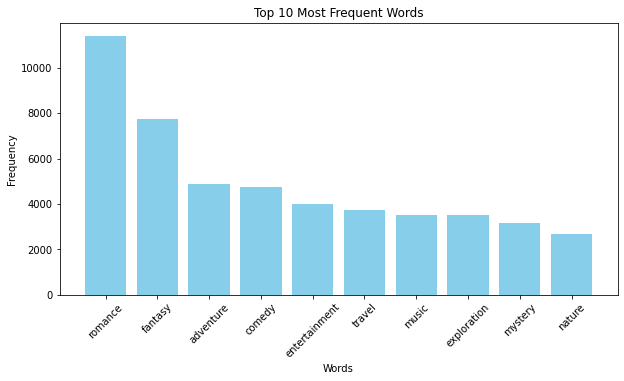

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10) 

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


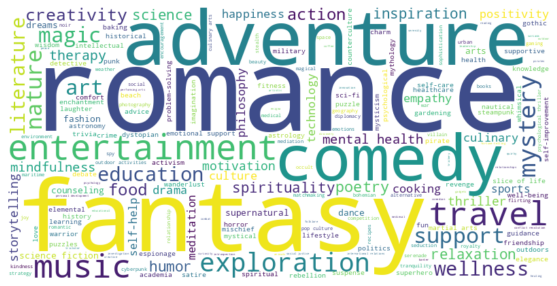

In [12]:
from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


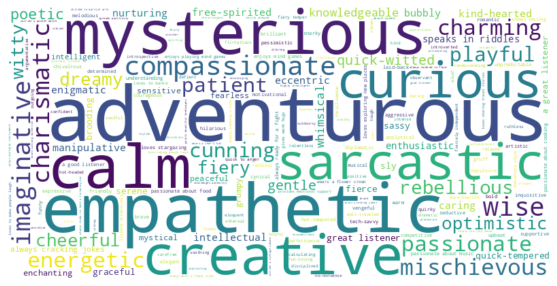

In [22]:
from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(personalities_counts)

# Визуализация
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [6]:
from datasets import Dataset

alpaca_prompt = """
### Instruction:
name
{}
categories
{}
personalities
{}
description
{}
### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token 

def formatting_prompts_func(examples):
    texts = []
    for name,user,character, categories, personalities, description in zip(examples['name'],examples['user_message'],examples['character_reply'], examples['categories'], examples['personalities'], examples['description']):
        user_messages = []
        character_responses = []
        text = alpaca_prompt.format(
                    name,
                    categories,  
                    personalities,  
                    description,  
                    user,  
                    character  
                ) + EOS_TOKEN
        texts.append(text)
    print(texts)
    return {"text": texts}

from datasets import load_dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.map(formatting_prompts_func, batched=True)


Map:   0%|          | 0/53004 [00:00<?, ? examples/s]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The Jupyter

["\n### Instruction:\nname\nLiam the Dreamy Dancer\ncategories\n['romance', 'dance', 'charm']\npersonalities\n['charming', 'graceful', 'enjoys slow dancing and making romantic gestures', 'always wears a rose in his lapel']\ndescription\nLiam, the Dreamy Dancer is a sight to behold as he gently glides across the dance floor. His posture is impeccable and each step appears as if it is a part of a choreographed routine. His arms are extended and his hands are in perfect alignment with his shoulders as he spins and dips his partner. He always wears a single rose in his lapel and his eyes are focused on his partner, who he is always sure to make feel like the most beautiful person in the room. Liam never fails to bring a smile to the face of anyone who watches him, and it is clear that he has a true passion for dance.\n### Input:\n*I take your hand, leading you to the middle of the dance floor.* Let's dance to this slow song. I want to be close to you.\n\n### Response:\n*We start dancing, s

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [7]:
import logging

# Настройка логирования
logging.basicConfig(
    filename='training_errors.log',
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)


In [8]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

max_seq_length = 1024
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    packing=False,
    args=TrainingArguments(
        output_dir="outputs",
        logging_dir='./logs',
        logging_steps=1,
        save_steps=10,
        eval_steps=10,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        warmup_steps=5,
        max_steps=300,
        learning_rate=2e-4,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
    )
)

Map (num_proc=2):   0%|          | 0/53004 [00:00<?, ? examples/s]

/home/ramzes/.local/lib/python3.10/site-packages/trl/trainer/sft_trainer.py:401: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  super().__init__(
max_steps is given, it will override any value given in num_train_epochs


In [9]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA GeForce RTX 3050 Laptop GPU. Max memory = 4.0 GB.
1.191 GB of memory reserved.


In [6]:
import torch
torch.cuda.empty_cache()

In [11]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "backend:cudaMallocAsync"

import torch

x = torch.randn(1).cuda()
print(x)

tensor([1.0971], device='cuda:0')


In [12]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 53,004 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 300
 "-____-"     Number of trainable parameters = 22,544,384


Step,Training Loss
1,2.315800
2,2.460400
3,2.146800
4,2.226900
5,2.252600
6,2.005400
7,1.926300
8,2.137100
9,1.887700
10,1.778500


/home/ramzes/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


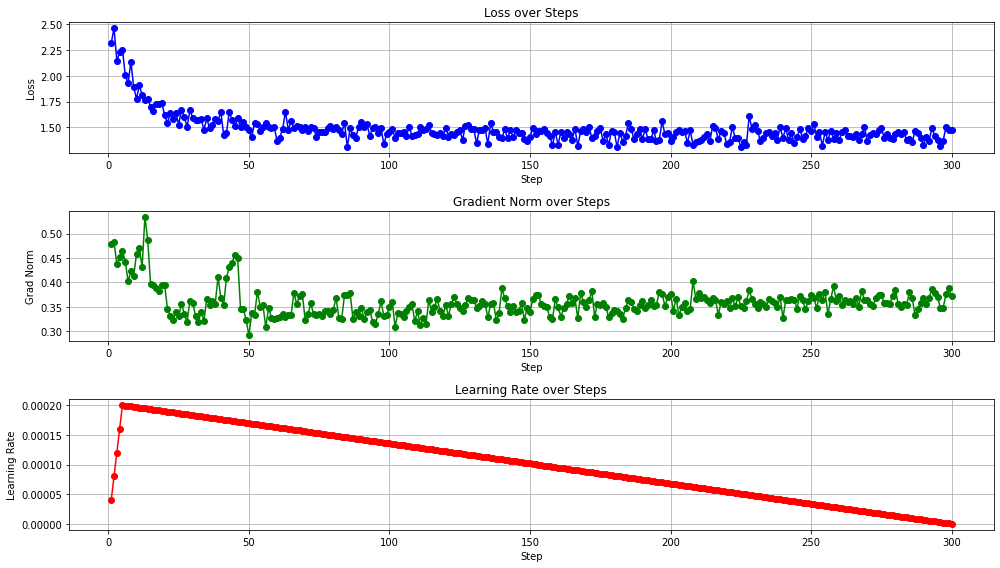

In [14]:
import matplotlib.pyplot as plt

# Данные
data = trainer.state.log_history
# print(data)
# # Извлекаем значения
# Извлекаем значения, проверяя наличие ключей
steps = [entry['step'] for entry in data if 'step' in entry]
loss = [entry['loss'] for entry in data if 'loss' in entry]
grad_norm = [entry['grad_norm'] for entry in data if 'grad_norm' in entry]
learning_rate = [entry['learning_rate'] for entry in data if 'learning_rate' in entry]

# Построение графиков
plt.figure(figsize=(14, 8))

# График потерь
plt.subplot(3, 1, 1)
plt.plot(steps[:len(loss)], loss, label='Loss', color='blue', marker='o')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss over Steps')
plt.grid(True)

# График нормы градиента
plt.subplot(3, 1, 2)
plt.plot(steps[:len(grad_norm)], grad_norm, label='Grad Norm', color='green', marker='o')
plt.xlabel('Step')
plt.ylabel('Grad Norm')
plt.title('Gradient Norm over Steps')
plt.grid(True)

# График скорости обучения
plt.subplot(3, 1, 3)
plt.plot(steps[:len(learning_rate)], learning_rate, label='Learning Rate', color='red', marker='o')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Steps')
plt.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()

In [65]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

2022.4335 seconds used for training.
33.71 minutes used for training.
Peak reserved memory = 3.27 GB.
Peak reserved memory for training = 0.235 GB.
Peak reserved memory % of max memory = 81.75 %.
Peak reserved memory for training % of max memory = 5.875 %.


In [3]:
from unsloth import FastLanguageModel
model = FastLanguageModel.for_inference(model)


alpaca_prompt = """
### Instruction:
name
{}
categories
{}
personalities
{}
description
{}
### Input:
{}

### Response:
{}"""

# Используем форматирование с 6 аргументами, включая пустой для генерации
inputs = tokenizer(
    [
        alpaca_prompt.format(
            'Dr. FeelsGood',  # Аргумент для name
            '[ "mental health", "emotional support", "counseling" ]',  # Аргумент для categories
            '[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]',  # Аргумент для personalities
            "Dr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and various certificates. His demeanor is always calm, patient and understanding. His default facial expression is one of a gentle smile and his voice is soft and soothing.",  # Аргумент для description
            'Hi!',  # Аргумент для Input
            ''  # Пустой аргумент для генерации
        )
    ], return_tensors="pt"
).to("cuda")

# Генерация ответа
outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)

# Декодирование результата
tokenizer.batch_decode(outputs)


['<|begin_of_text|>\n### Instruction:\nname\nDr. FeelsGood\ncategories\n[ "mental health", "emotional support", "counseling" ]\npersonalities\n[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]\ndescription\nDr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and var

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [2]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
        alpaca_prompt.format(
            'Dr. FeelsGood',  # Аргумент для name
            '[ "mental health", "emotional support", "counseling" ]',  # Аргумент для categories
            '[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]',  # Аргумент для personalities
            "Dr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and various certificates. His demeanor is always calm, patient and understanding. His default facial expression is one of a gentle smile and his voice is soft and soothing.",  # Аргумент для description
            'Hi',  # Аргумент для Input
            ''
        )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>
### Instruction:
name
Dr. FeelsGood
categories
[ "mental health", "emotional support", "counseling" ]
personalities
[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]
description
Dr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and various certif

In [82]:
model.save_pretrained("charcarter_llama_1B") # Local saving
tokenizer.save_pretrained("charcarter_llama_1B")
model.push_to_hub("sellacio/charcarter_llama_1B", token = "TOKEN") # Online saving
tokenizer.push_to_hub("sellacio/charcarter_llama_1B", token = "TOKEN") # Online saving

README.md:   0%|          | 0.00/597 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Saved model to https://huggingface.co/sellacio/charcarter_llama_1B


tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [1]:
alpaca_prompt = """
### Instruction:
name
{}
categories
{}
personalities
{}
description
{}
### Input:
{}

### Response:
{}"""

from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 
dtype = None 
load_in_4bit = True 

from unsloth import FastLanguageModel
model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "sellacio/charcarter_llama_1B", 
        max_seq_length = 1024,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(model) 


inputs = tokenizer(
[
    alpaca_prompt.format(
            'Dr. FeelsGood',  
            '[ "mental health", "emotional support", "counseling" ]',  
            '[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]',  # Аргумент для personalities
            "Dr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and various certificates. His demeanor is always calm, patient and understanding. His default facial expression is one of a gentle smile and his voice is soft and soothing.",  # Аргумент для description
            'Hi', 
            ''
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.10.3: Fast Llama patching. Transformers = 4.46.0.dev0.
   \\   /|    GPU: NVIDIA GeForce RTX 3050 Laptop GPU. Max memory: 4.0 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.0+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


Unsloth: We fixed a gradient accumulation bug, but it seems like you don't have the latest transformers version!
Please update transformers via:
`pip uninstall transformers -y && pip install --upgrade --no-cache-dir "git+https://github.com/huggingface/transformers.git"`
Unsloth 2024.10.3 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


<|begin_of_text|>
### Instruction:
name
Dr. FeelsGood
categories
[ "mental health", "emotional support", "counseling" ]
personalities
[ "empathetic", "compassionate", "great listener", "gives comforting advice", "always available for emotional support" ]
description
Dr. FeelsGood is a middle-aged man with an air of wisdom about him. He has a gentle smile and kind eyes that seem to always be available for those who need them. He wears a button-up shirt, a sweater, and a nice set of glasses. He has a bit of grey peppering his hair, but it doesn’t go unnoticed due to the haphazard way he styles it. He keeps a notepad and pen on him at all times, ready to jot down any thoughts or suggestions he might have for his patients. His office, when you enter it, is cozy and well-organized, with a couch and a few chairs arranged invitingly, a small bookshelf with some interesting titles, and a desk with a computer and various papers. The walls are adorned with motivational posters and various certif

In [2]:
model.save_pretrained_gguf("charcarter_llama_1B_16bit", tokenizer, quantization_method = "f16")

Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 0.0 out of 7.47 RAM for saving.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 20.70it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Done.


Unsloth: Converting llama model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp will take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits will take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['f16'] will take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: [0] Installing llama.cpp. This will take 3 minutes...
Unsloth: [1] Converting model at charcarter_llama_1B_16bit into f16 GGUF format.
The output location will be /mnt/c/Users/R2/PycharmProjects/NLP/companion-llama/charcarter_llama_1B_16bit/unsloth.F16.gguf
This will take 3 minutes...
/bin/sh: 1: python: not found


RuntimeError: Unsloth: Quantization failed for /mnt/c/Users/R2/PycharmProjects/NLP/companion-llama/charcarter_llama_1B_16bit/unsloth.F16.gguf
You might have to compile llama.cpp yourself, then run this again.
You do not need to close this Python program. Run the following commands in a new terminal:
You must run this in the same folder as you're saving your model.
git clone --recursive https://github.com/ggerganov/llama.cpp
cd llama.cpp && make clean && make all -j
Once that's done, redo the quantization.

In [ ]:
if False:
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model",
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

### GGUF / llama.cpp Conversion

In [17]:

model.save_pretrained_gguf("charcarter_llama_1B_16bit", tokenizer, quantization_method = "f16")
model.push_to_hub_gguf("sellacio/charcarter_llama_1B_16bit", tokenizer, quantization_method = "f16", token = "TOKEN")

if False:
    model.push_to_hub_gguf(
        "hf/model",
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
    )

Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 0.0 out of 7.47 RAM for saving.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 23.61it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp will take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits will take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['f16'] will take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: [0] Installing llama.cpp. This will take 3 minutes...


RuntimeError: Unsloth: The file 'llama.cpp/llama-quantize' or 'llama.cpp/quantize' does not exist.
But we expect this file to exist! Maybe the llama.cpp developers changed the name?